Bu veri seti, Arizona'da yaşayan Pima Kızılderili kadınları üzerinde yapılan diyabet çalışmalarından elde edilen verileri içerir.
Veri seti aşağıdaki özellikleri içermektedir:
   1. **Pregnancies:** Hamilelik sayısı.<br>
   2. **Glucose:** Oral glikoz tolerans testinde 2 saatlik plazma glikoz konsantrasyonu.<br>
   3. **Blood Pressure:** Kan basıncı (mm Hg).<br>
   4. **Skin Thickness:** Triceps deri kıvrım kalınlığı (mm).<br>
   5. **Insulin:** 2 saatlik serum insülini (mu U/ml).<br>
   6. **BMI:** Vücut kitle indeksi (ağırlık kg/(boy m)^2).<br>
   7. **Diabetes Pedigree Function:** Diyabet soyağacı fonksiyonu, aile geçmişine dayalı diyabet olasılığını belirleyen bir fonksiyon.<br>
   8. **Age:** Yaş (yıl).<br>
   9. **Outcome:** Sınıf etiketi (0 veya 1), kişinin diyabet hastası olup olmadığını gösterir. 1 diyabet hastası olduğunu, 0 ise olmadığını belirtir.<br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [5]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

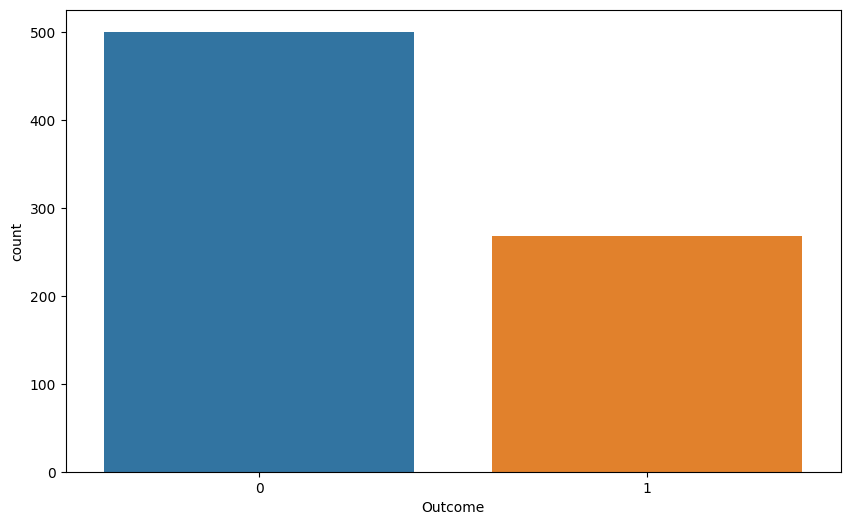

In [11]:
sns.countplot(data=df, x='Outcome', palette='tab10');

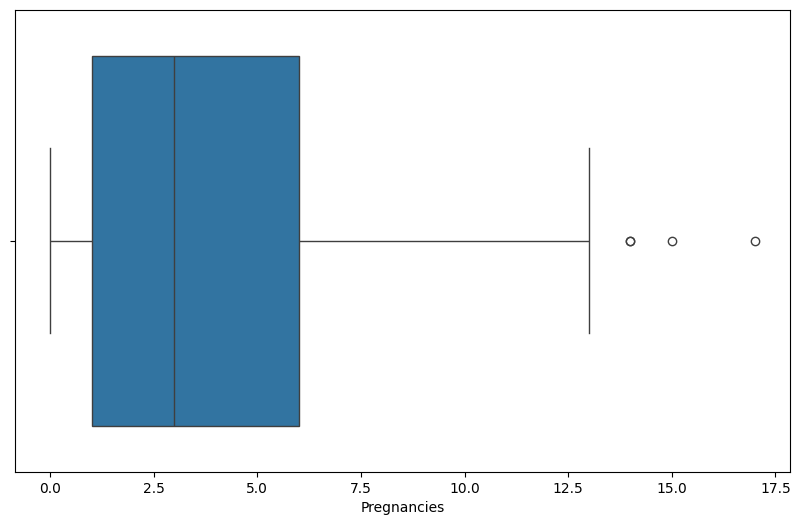

In [13]:
sns.boxplot(x=df.Pregnancies);

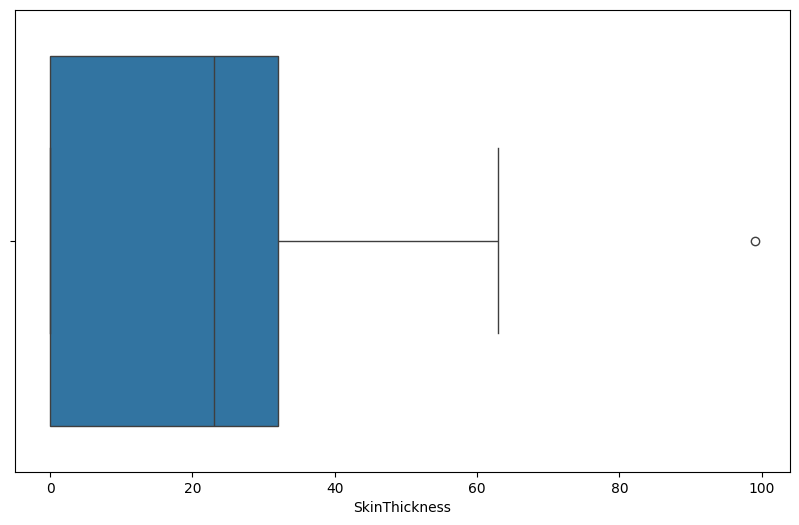

In [14]:
sns.boxplot(x=df.SkinThickness);

In [15]:
df = df[df.SkinThickness<70]

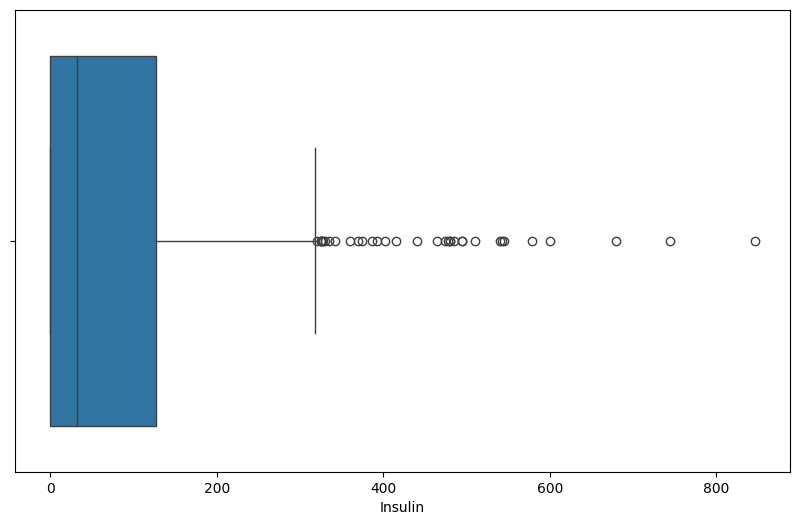

In [16]:
sns.boxplot(x=df.Insulin);

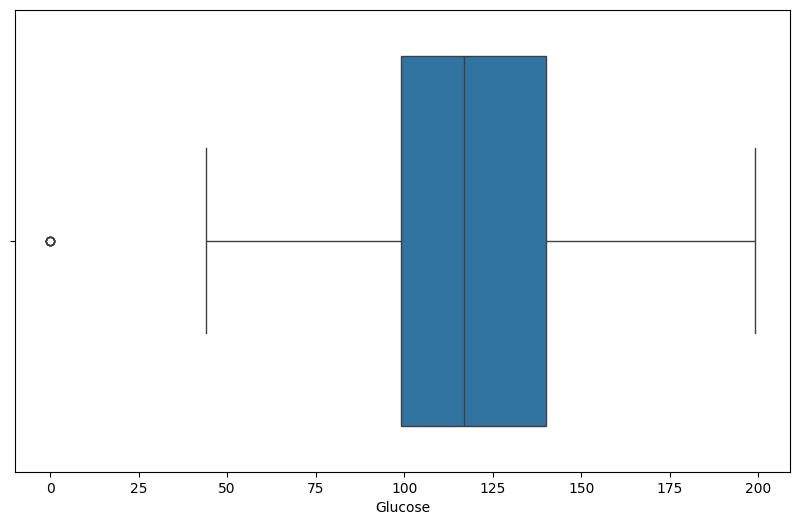

In [17]:
sns.boxplot(x=df.Glucose);


In [18]:
df = df[df.Glucose>0]

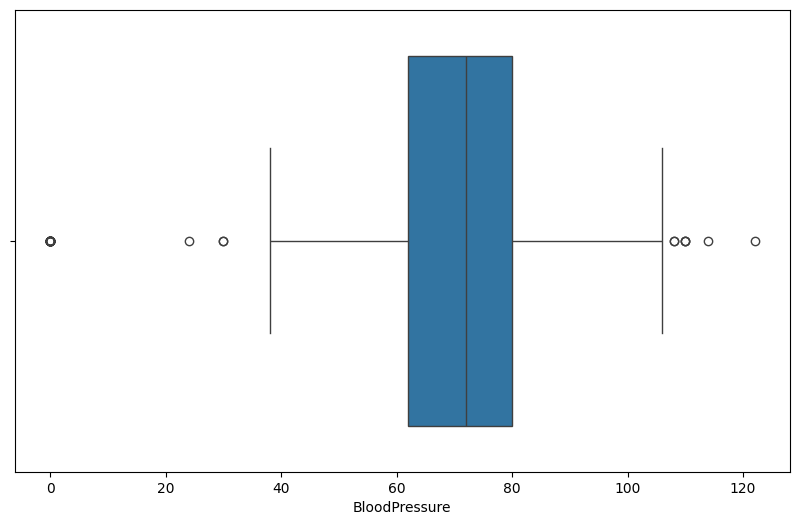

In [19]:
sns.boxplot(x=df.BloodPressure);

In [21]:

df = df[df.BloodPressure>35]

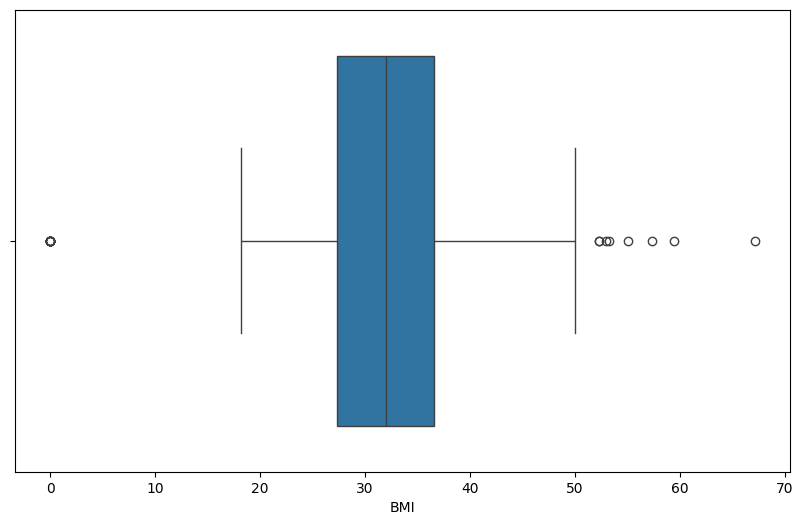

In [20]:
sns.boxplot(x=df.BMI);

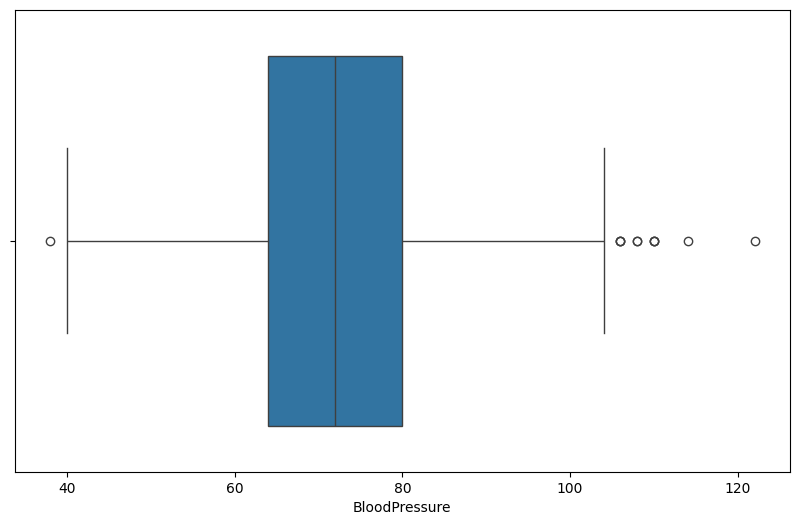

In [22]:
sns.boxplot(x=df.BloodPressure);

In [23]:
df = df[df.BMI>0]

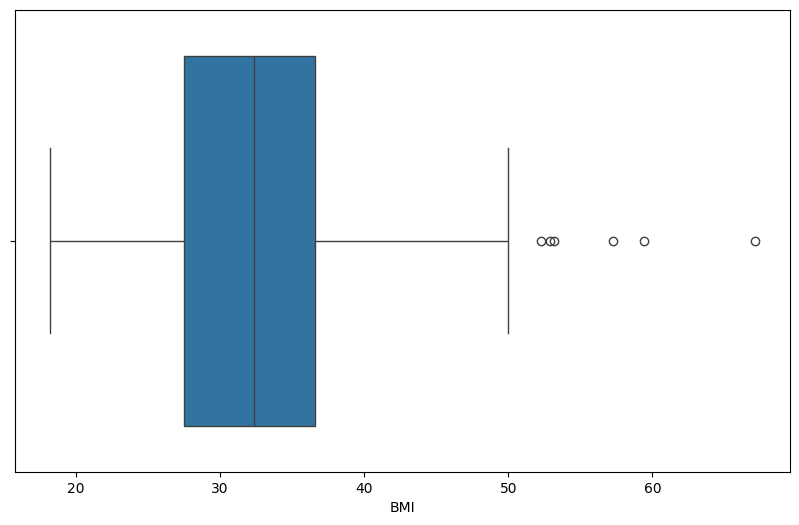

In [24]:
sns.boxplot(x=df.BMI);

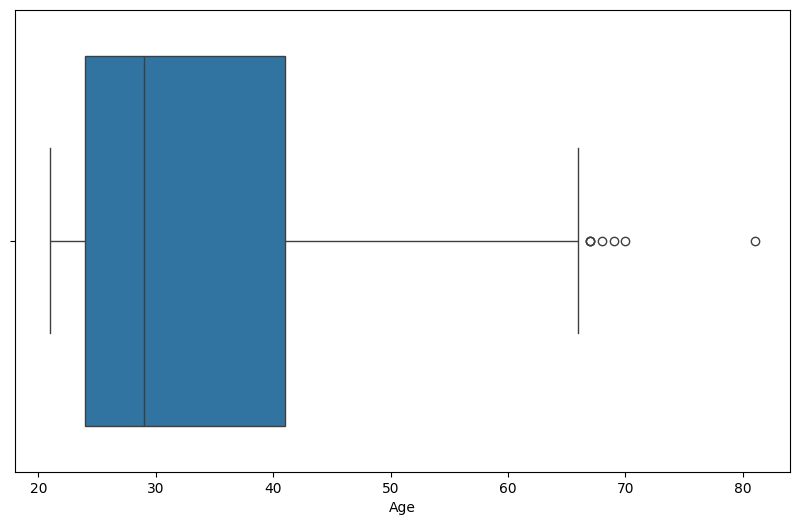

In [25]:
sns.boxplot(x=df.Age);

In [26]:
df.shape

(720, 9)

In [27]:
df.Outcome.value_counts()

Outcome
0    473
1    247
Name: count, dtype: int64

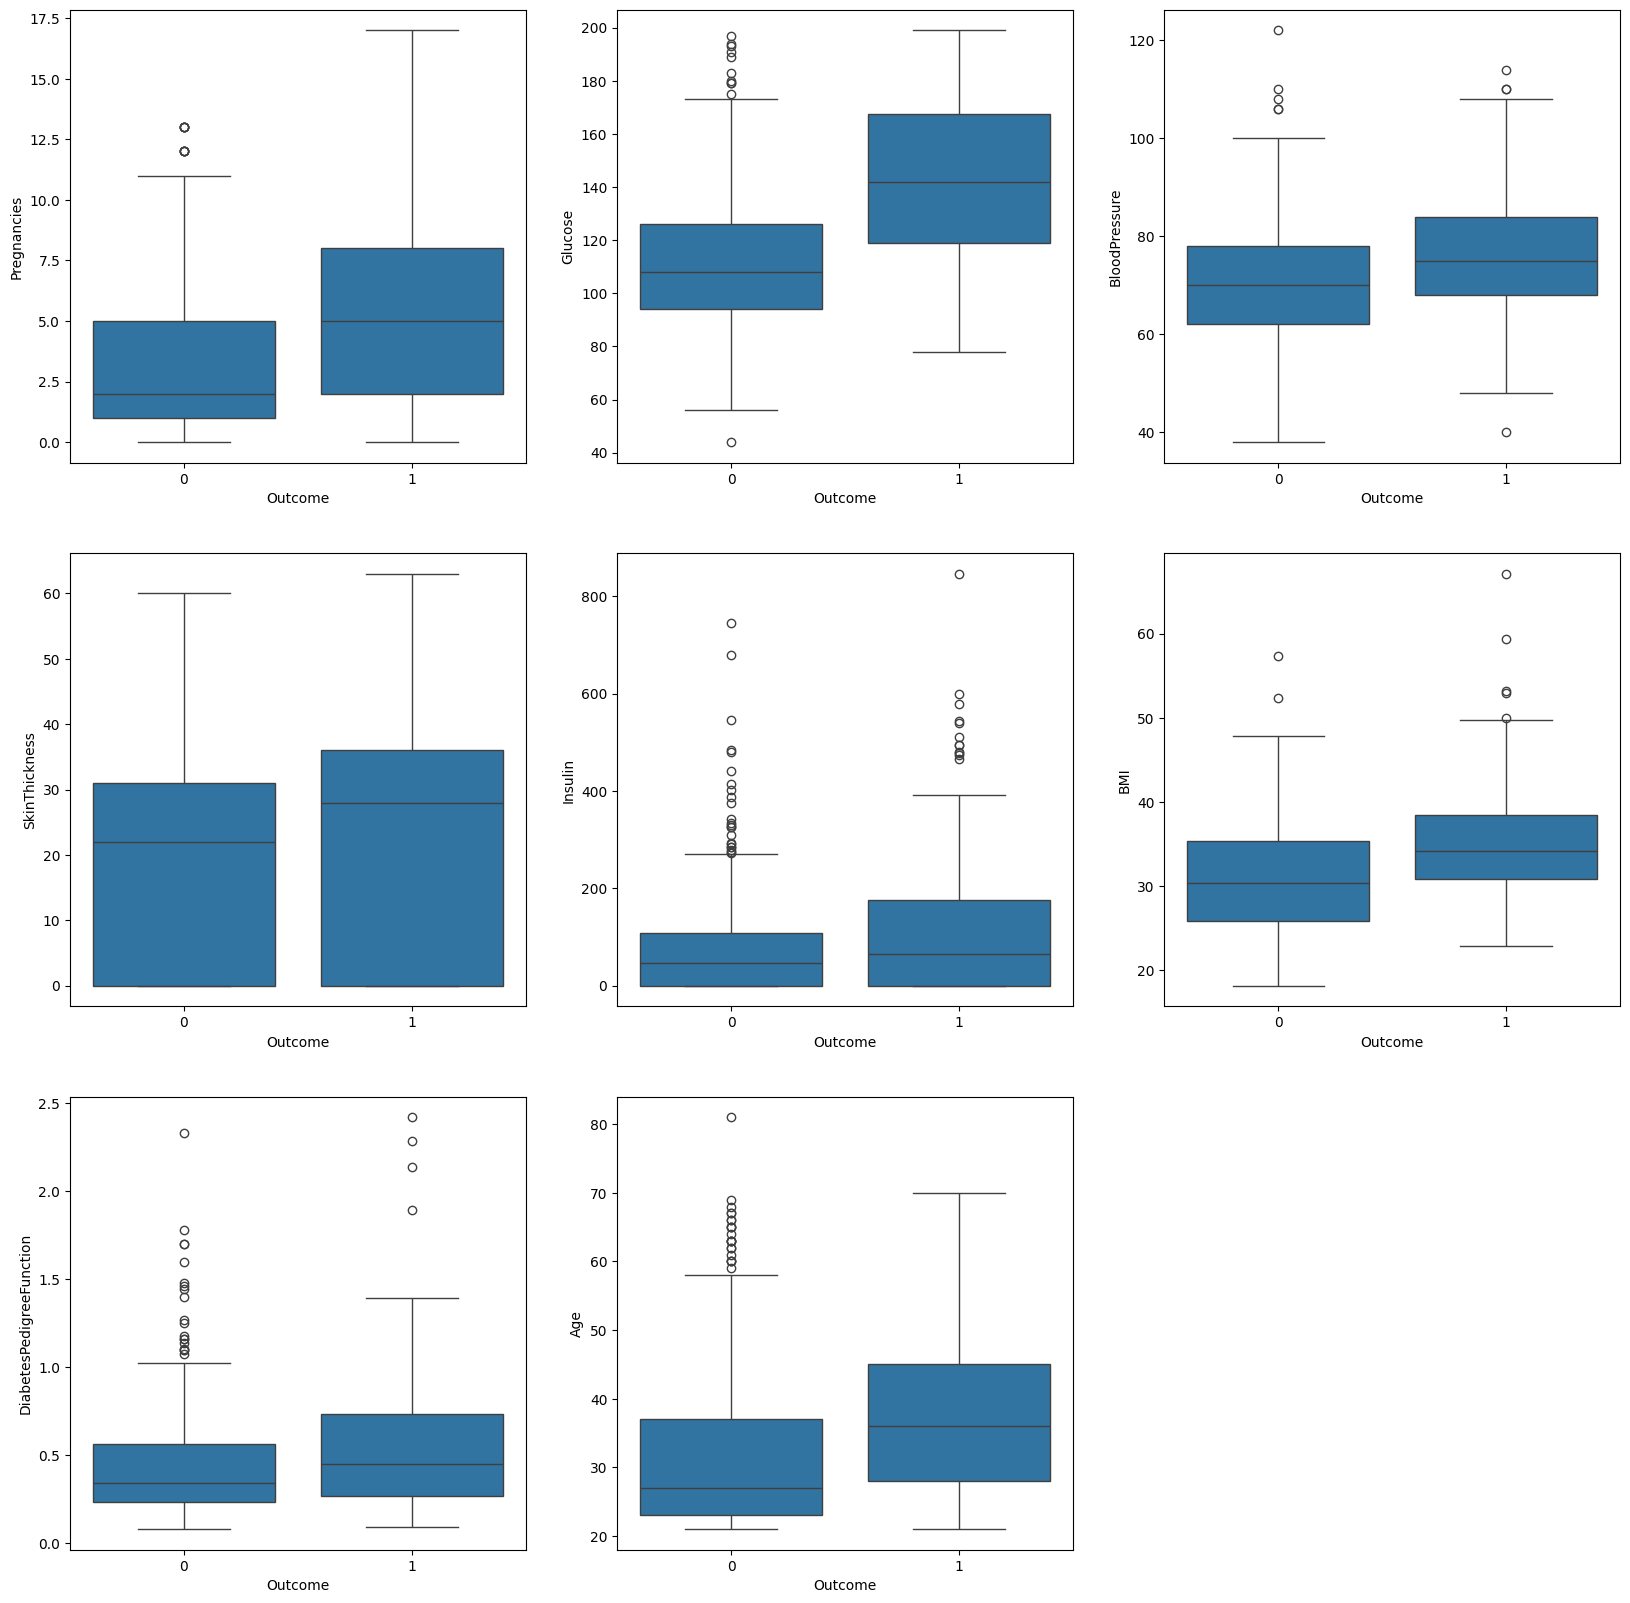

In [29]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True);

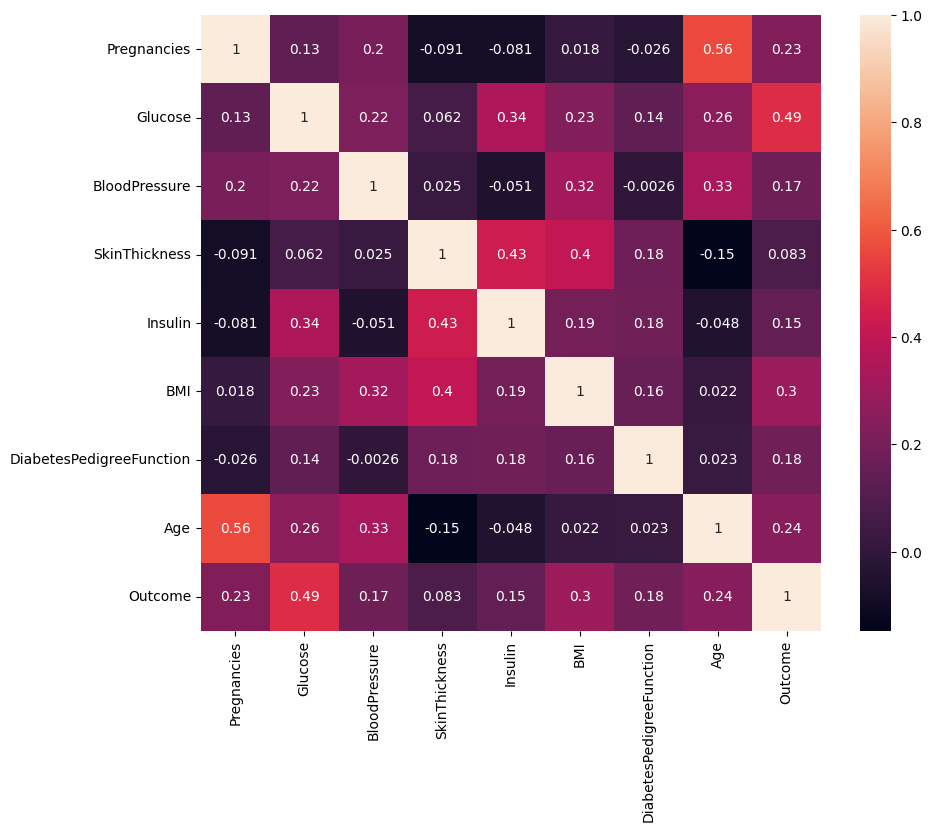

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True);

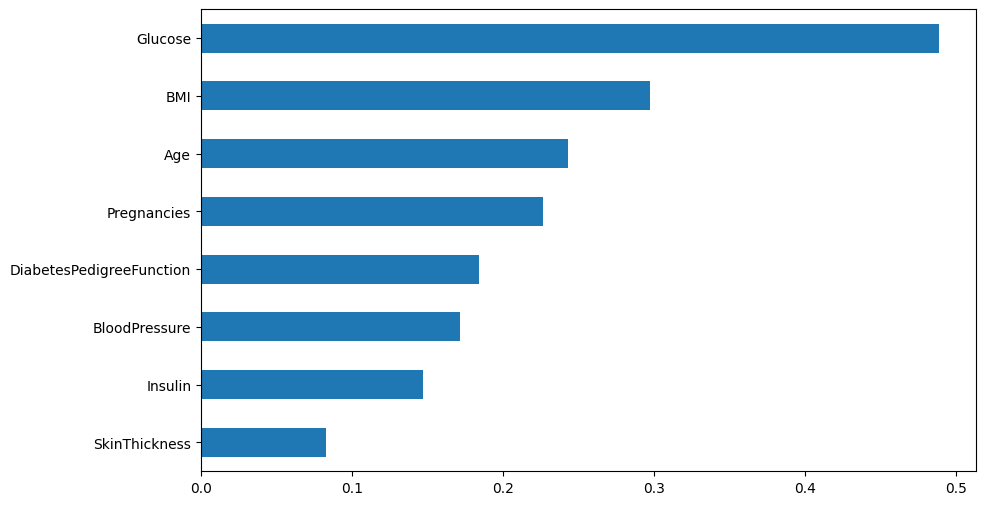

In [32]:
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh();